In [349]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv


In [358]:
#trapping frequencies, will be determined by trap size first of all
freq_axial = 300
freq_radial = 2000

E_CHARGE = 1.6*10**(-19)
E_MASS = 9.1*10**(-31)
BOLTZMANN = 1.38*10**(-23)
H_BAR = 1.05*10**(-34)

#Values Taken from Wineland paper "Ion calorimeter"
R = 100000
C = 12*10**(-12)
L = 8000

#Values mostly following the feasibility study paper
kappa = 1
d = 60*10**(-6)
d_eff = 254*10**(-6)
T = 0.7
alpha_motion = 30
N_steps = 30000
w0 = 3e8*2*np.pi

For the given values, we get a damping constant of 200kHz, corresponding to 5 us cooling time - as predicted in paper. Cooling the radial mode instead, at the same electrode distance, would also give the same cooling rate.

0.9999999999999999


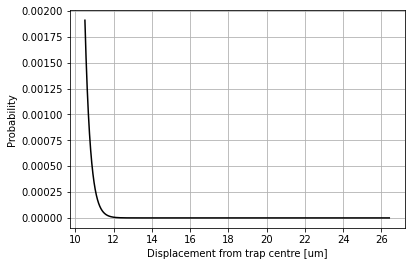

In [359]:
#Amplitude of electron oscillation in first coherent state:

#Expected position distribution following a Maxwell-Boltzmann approach: (1D)
z_dot = np.sqrt((2*alpha_motion**2*H_BAR*w0 + H_BAR*w0/(4*np.pi))/E_MASS)
vel = np.linspace(0,N_steps,N_steps) + z_dot
Pv = np.sqrt(E_MASS/(2*np.pi*BOLTZMANN*T))*np.exp((-E_MASS*vel**2)/(2*BOLTZMANN*T))
#Velocity gets translated to amplitude according to HO rules, prob. distribution gets normalized
Am = vel/w0*10**6
normalisation = np.sum(Pv)
Pv = Pv/normalisation
print(np.sum(Pv))

plt.figure()
plt.grid()
plt.xlabel("Displacement from trap centre [um]")
plt.ylabel("Probability")
plt.plot(Am,Pv,'k')
plt.savefig("Displacement probability.png")
plt.show()

In [360]:
#Decouple equations: x and y positions are substituted by their expectation values. The numbers are taken from the full simulation Edith has done
x_bar = 0
y_bar = 0
x2_bar = 0.37**2
y2_bar = 0.37**2
x3_bar = 0
y3_bar = 0
x4_bar = 0.37**4
y4_bar = 0.37**4

Vij = np.zeros(49)
#with open(f'C:/Users/Hansd/Desktop/Jupyter Notebooks/spherharm_real.csv') as csv_file:
with open(f'C:/Users/Hansd/Documents/Berkelius/Data/Ansys_potentials/75harm_2um_201pts_extracted.csv') as csv_file:
        csv_reader = csv.reader(
            csv_file, delimiter=';')
        line_count = 0
        for row in csv_reader:
            Vij[line_count] = row[0]
            line_count += 1
#Simulates much higher voltage applied to the electrodes, so that we actually achieve the desired trap frequencies.
#Vij *= 0.8e12
Vij = Vij*E_CHARGE/E_MASS


V2_prov = 1/2.*np.sqrt(5/np.pi)*Vij[4] + np.sqrt(21/2/np.pi)*(x_bar*Vij[11] + y_bar)*Vij[10] + 9/2*np.sqrt(5/np.pi)*y_bar*x_bar*Vij[20] + 9/4*np.sqrt(5/np.pi)*(x2_bar - y2_bar)*Vij[19] - 9/2*np.sqrt(5/2/np.pi)*x_bar*(x_bar+y_bar)*Vij[17] - 9/2*np.sqrt(5/2/np.pi)*y_bar*(x_bar+y_bar)*Vij[18] - 9/2*np.sqrt(1/np.pi)*(x2_bar + y2_bar + 2*x_bar*y_bar)*Vij[16]
- 1/2*np.sqrt(385/np.pi)*(-3*x2_bar*y_bar + y3_bar)*Vij[31] -1/2*np.sqrt(385/np.pi)*(x3_bar - 3*x_bar*y2_bar)*Vij[30] -3/2*np.sqrt(165/2/np.pi)*(x2_bar*y_bar+y3_bar)*Vij[27] -3/2*np.sqrt(165/2/np.pi)*(x3_bar+x_bar*y2_bar)*Vij[26] -15/2*np.sqrt(91/2/np.pi)*(x3_bar*y_bar - y3_bar*x_bar)*Vij[44] -15/8*np.sqrt(91/2/np.pi)*(x4_bar - 6*y2_bar*x2_bar+y4_bar)*Vij[43]
- np.sqrt(1365/np.pi)*(x3_bar*y_bar + y3_bar*x_bar)*Vij[40] -1/2*np.sqrt(1365/np.pi)*(x3_bar*y_bar + y3_bar*x_bar)*Vij[40] + 45/16*np.sqrt(13/np.pi)*(x4_bar + y4_bar + 2*x2_bar*y2_bar)*Vij[36]

w0 = 3e8*2*np.pi
V2 = w0**2/2
r = V2/V2_prov
Vij *= r
print(r)

#w0 = np.sqrt(2*V2)
alpha = Vij[9]*1/2.*np.sqrt(7/np.pi) + Vij[19]*3*np.sqrt(5/2/np.pi)*y_bar + Vij[17]*3*np.sqrt(5/2/np.pi)*x_bar + Vij[29]*np.sqrt(1155/2/np.pi)*y_bar*x_bar - Vij[25]*5/2*np.sqrt(11/np.pi)*(y2_bar +x2_bar) + Vij[28]*1/2*np.sqrt(1155/2/np.pi)*(x2_bar - y2_bar)   
alpha += Vij[42]*1/2.*np.sqrt(1365/np.pi)*(3*x2_bar*y_bar - y3_bar) - Vij[38]*5/2*np.sqrt(273/2/np.pi)*(x2_bar*y_bar + y3_bar) - Vij[37]*5/2*np.sqrt(273/2/np.pi)*(x3_bar + x_bar*y2_bar)+ Vij[41]*1/2*np.sqrt(1365/np.pi)*(y2_bar*x_bar - x3_bar)
beta = Vij[16] * 3/2. * np.sqrt(1/np.pi) + Vij[27]*np.sqrt(165/2/np.pi)*y_bar + Vij[26]*np.sqrt(165/2/np.pi)*x_bar + Vij[40]*np.sqrt(1365/np.pi)*x_bar*y_bar + Vij[39]*np.sqrt(1365/np.pi)*(x2_bar - y2_bar) - Vij[36]*15/4*np.sqrt(13/np.pi)*(x2_bar + y2_bar)
gamma = Vij[25]*1/2.*np.sqrt(11/np.pi) + Vij[38]*np.sqrt(273/2/np.pi)*y_bar + Vij[37]*np.sqrt(273/2/np.pi)*x_bar
delta = Vij[36]*1/2.*np.sqrt(13/np.pi)

alpha *= 3
beta *=4
gamma *=5
delta*=6


1133705.2351402477


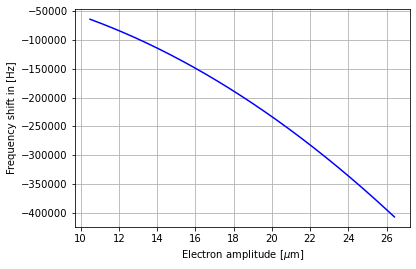

In [361]:
#Calculate the frequency shift and plot it as a function of amplitude

del_w =  Am**2*(3*beta/(8*w0) -5*alpha**2/(12*w0**3)) + Am**4/(2*w0)*(10*delta/16 - 15*beta**2/(288*w0**2) - 7/4*gamma*alpha/w0**2 - 215/288*alpha**4/w0**6 + 63/32 *beta*alpha**2/w0**4)
del_w = del_w /(2*np.pi)

plt.figure()
plt.grid(True)
plt.xlabel("Electron amplitude [$\mu$m]")
plt.ylabel("Frequency shift in [Hz]")
plt.plot(Am,del_w,'b')
plt.savefig("Second stat attempt.png")
plt.show()

The total damping rate and notch width is: 6902.406408381553


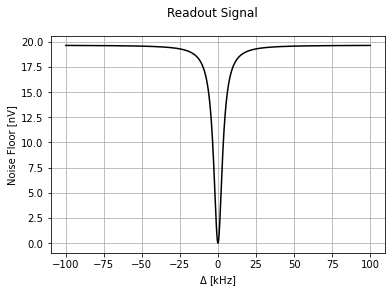

19786.5632317557
[1.23967016e-06 1.23967016e-06 1.23967016e-06 ... 1.23966570e-06
 1.23966570e-06 1.23966570e-06]


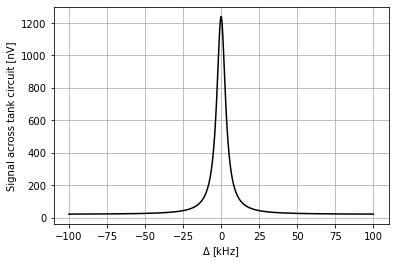

[3.89453167e-06 1.88495559e+09 4.33690465e+04]


In [362]:
##### Axial motion
#Note: Gabrielse gives completely different values for Delta_w and Gamma, still think mine make sense in this context

Delta_w = 1e2


#Readout signal according to Geonium Theory, only taking the real part
w = np.linspace(299.9*10**6,300.1*10**6,N_steps)*2*np.pi
v = np.sqrt(4*BOLTZMANN*T*R*Delta_w)

Re_Z = R/(1+R**2/(w**2*L**2) + w*2*C**2*R**2 - 2*R*C/L)

Gamma = (E_CHARGE/d_eff)**2 * Re_Z/E_MASS# + 2*np.abs(anharm)
print(f'The total damping rate and notch width is: {Gamma[5000]/2/np.pi}')

SS = v*(w0**2 - w**2)**2/((w0**2-w**2)**2+Gamma**2*w**2)
 
plt.figure()
plt.plot(w*1e-3/2/np.pi-3e5,SS*1e9,'k', label = f'$\gamma$ = {Gamma[5000]/2/np.pi}')
plt.grid()
plt.suptitle("Readout Signal")
plt.xlabel("$\Delta$ [kHz]")
plt.ylabel("Noise Floor [nV]")
plt.savefig("anharmonic notch.png")
plt.show()

z_dot = np.sqrt((2*alpha_motion**2*H_BAR*w0 + H_BAR*w0/(4*np.pi))/E_MASS)
print(z_dot)
V_d = E_CHARGE/d_eff * Re_Z * z_dot
print(V_d)
S_d = V_d * (Gamma**2/4)/((w-w0)**2 + Gamma**2/4)
plt.figure()
plt.plot(w*1e-3/2/np.pi-3e5,(S_d + SS)*1e9,'k')
plt.grid()
plt.xlabel("$\Delta$ [kHz]")
plt.ylabel("Signal across tank circuit [nV]")
plt.savefig("anharmonic peak.png")
plt.show()

def model(x, peak, centre, width):
    L = peak/np.pi * (0.5*width)**2/((centre - x)**2 + (0.5*width)**2)
    return L 
p_guess = [4e-6,300000000*2*np.pi,100000]
pop,pcov = curve_fit(model,w,S_d,p0 = p_guess)
print(pop)

-398903.62806233414
299989268.0858539
[1.94450531e-08 1.88495538e+09 7.31843964e+01]
expect:3.8639999999999985e-21


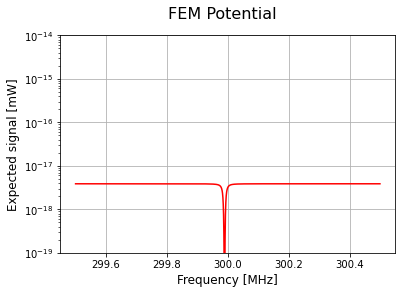

In [363]:
w = np.linspace(299.5*10**6,300.5*10**6,N_steps)*2*np.pi

#Summing over all possible shifts with their weighted likelihoods
#This is where the effect of the anharmonicities adds and also creates a broadening

See = np.zeros(len(w))
S_dee = np.zeros(len(w))
w_res_eff = w0 + del_w
print(del_w[-500])
w_shifted = 0
for i, res in enumerate(w_res_eff):
    w_shifted += Pv[i]*res
    See += v*Pv[i]*((res)**2 - w**2)**2/(((res)**2-w**2)**2+Gamma**2*w**2)
    S_dee += V_d*Pv[i] * (Gamma**2/4)/((w-res)**2 + Gamma**2/4)
print(w_shifted/2/np.pi)
def model(x, base, centre, width):
    L = base*((centre)**2 - x**2)**2/(((centre)**2-x**2)**2+width**2*x**2)
    return L 
p_guess = [4.5e-8,300000000*2*np.pi,10000]
pop,pcov = curve_fit(model,w,See,p0 = p_guess)
print(pop)
print(f'expect:{4*BOLTZMANN*Delta_w*T}')

plt.figure()
plt.plot(w*1e-6/2/np.pi,See**2/R*1e3,'r')
#plt.plot(w*1e-6/2/np.pi,model(w,pop[0],pop[1],pop[2])*1e3, 'b', linestyle = "dashed",alpha = 0.7)
plt.grid(True)
plt.yscale('log')
#plt.legend()
plt.xlabel("Frequency [MHz]",fontsize = 12)
plt.ylabel("Expected signal [mW]",fontsize = 12)
plt.suptitle('FEM Potential',fontsize = 16)
plt.ylim(1e-19,1e-14)
plt.savefig("C:/Users/Hansd/Documents/Berkelius/Pictures for Master Thesis/Stellvertreter_notch_log_Ansys.png")
plt.show()
plt.close()

#maybe that's a good idea

No handles with labels found to put in legend.


[3.89453167e-06 1.88495559e+09 2.16845233e+05]


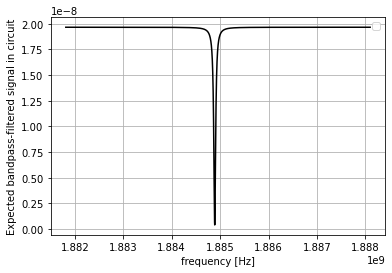

No handles with labels found to put in legend.


20296.78669796136


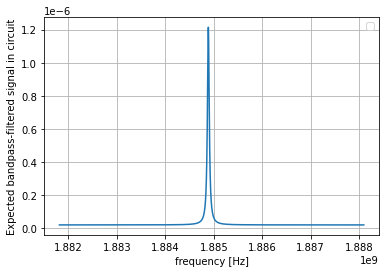

In [364]:
##### Axial motion
#Note: Gabrielse gives completely different values for Delta_w and Gamma, still think mine make sense in this context

Delta_w = 1*10**2


#Readout signal according to Geonium Theory, only taking the real part
v = np.sqrt(4*BOLTZMANN*T*R*Delta_w)

Re_Z = R/(1+R**2/(w**2*L**2) + w*2*C**2*R**2 - 2*R*C/L)

Gamma = (E_CHARGE/d_eff)**2 * Re_Z/E_MASS# + 2*np.abs(anharm)


def model(x, peak, centre, width):
    L = peak/np.pi * (0.5*width)**2/((centre - x)**2 + (0.5*width)**2)
    return L 
p_guess = [4e-6,300000000*2*np.pi,100000]
pop,pcov = curve_fit(model,w,S_d,p0 = p_guess)
print(pop)






plt.figure()
plt.plot(w,See,'k')
plt.grid()
plt.legend()
plt.xlabel("frequency [Hz]")
plt.ylabel("Expected bandpass-filtered signal in circuit")
plt.suptitle("")
plt.savefig("anharmonic notch2.png")
plt.show()
plt.close()

z_dot = np.sum(vel*Pv)#np.sqrt(2*BOLTZMANN*T/E_MASS) #np.sqrt((2*alpha**2*H_BAR*2*np.pi*w_z + H_BAR*w_z/2)/E_MASS)
print(z_dot)
plt.figure()
plt.plot(w,S_dee + See)
#plt.plot(w,model(w,pop[0],pop[1],pop[2])+See, 'r', linestyle = "dashed")
plt.grid()
plt.legend()
plt.xlabel("frequency [Hz]")
plt.ylabel("Expected bandpass-filtered signal in circuit")
plt.savefig("anharmonic peak2.png")
plt.show()
plt.close()

-398903.62806233414
-252.4720458636469
17.244116283560896


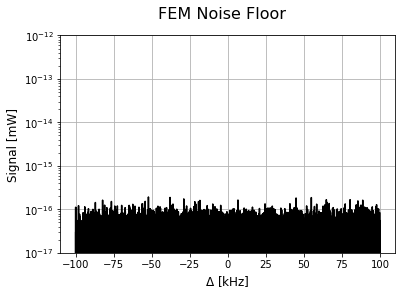

C:\Users\Hansd\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


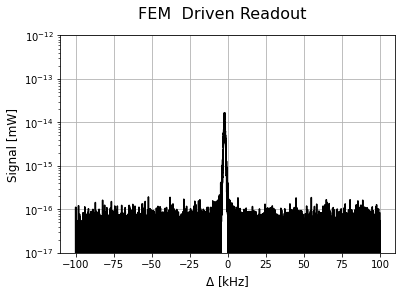

In [365]:


#Again calculating superposition of shifted signals

V_d = E_CHARGE/d_eff * Re_Z * z_dot
v = np.random.randn(len(w))*np.sqrt(4*BOLTZMANN*T*R*Delta_w)
S = np.zeros(len(w))
S_d = np.zeros(len(w))
w_res_eff = w0 + del_w
print(del_w[-500])
for i, res in enumerate(w_res_eff):
    S += v*Pv[i]*((res)**2 - w**2)**2/(((res)**2-w**2)**2+Gamma**2*w**2)
    S_d += V_d*Pv[i] * (Gamma**2/4)/((w-res)**2 + Gamma**2/4)

#Here we add noise to the signal to model the effect the amplifiers would have in real life
w = np.linspace(299.9*10**6,300.1*10**6,N_steps)*2*np.pi
N = np.random.randn(len(w))

THEMT = 1.5
N *= np.sqrt(4*BOLTZMANN*THEMT*R*Delta_w)

#Try to fit the signal that arises from the superposition, still assume it to be Lorentzian
#Fitting the Lorentzian
def model(x,centre,width,baseline):
    f = baseline*(centre**2 - x**2)**2/((centre**2-x**2)**2+width**2*x**2)
    return f
p_guess = [300000000*2*np.pi,2000000,4e-7]

n=12
Std = np.zeros(len(w)-n)
for i in range(len(w)-n):
    Std[i] = np.std((S+N)[i:i+n])


#Here we print the frequency shift and the broadening
pop,pcov = curve_fit(model,w,np.abs(S+N),p0 = p_guess)
print((pop[0]-w0)/2/np.pi)
print(pop[1]/2/np.pi)
plt.figure()
plt.suptitle("FEM Noise Floor",fontsize = 16)
plt.plot(w/(2*np.pi*1e3)-3e5,(S+N)**2/R*1e3,'k')
#plt.plot(w/(2*np.pi*1e3) -3e5,model(w,pop[0],pop[1],pop[2])*1e9,'r',linestyle = 'dashed', label = f'$\gamma$  = {-pop[1]/2/np.pi}')
#plt.plot(w[6:-6],Std,'r',linestyle = 'dashed')
plt.grid()

plt.xlabel("$\Delta$ [kHz]",fontsize = 12)
plt.ylabel("Signal [mW]",fontsize = 12)
plt.yscale('log')
plt.ylim(1e-17,1e-12)
plt.savefig("C:/Users/Hansd/Documents/Berkelius/Pictures for Master Thesis/Stellvertreter Notch in noise signal.png")
plt.show()

def model2(x,centre,width,baseline,peak):
    L = peak/np.pi * (0.5*width)**2/((centre - x)**2 + (0.5*width)**2)
    return L
p_guess = [300000000*2*np.pi,5000,2e-6,5e-7]
vop,vcov = curve_fit(model2,w,np.abs(S_d+S+N),p0 = p_guess)


plt.figure()
plt.plot(w/(2*np.pi*1e3)-3e5,(S_d+S+N)**2/R*1e3,'k')
#plt.plot(w/(2*np.pi*1e3)-3e5,model2(w,vop[0],vop[1],vop[2],vop[3])*1e9,'r',linestyle = 'dashed',label =f'$\gamma$  = {vop[1]/2/np.pi}')
plt.grid()
plt.ylim(1e-17,1e-12)
plt.suptitle("FEM  Driven Readout", fontsize = 16)
plt.yscale('log')
plt.xlabel("$\Delta$ [kHz]",fontsize = 12)
plt.ylabel("Signal [mW]",fontsize = 12)
plt.savefig("pessimistic driving.png")
plt.show()

Unknown factors not accounted for in this calculation: 1.Anharmonicity extrapolation based on single surface trap - we have two. 2. Not accounting for cross-terms of anharmonic potential. 3. Assumed anharmonicity contribution scale each with their corresponding spatial dimensionality. Do they?

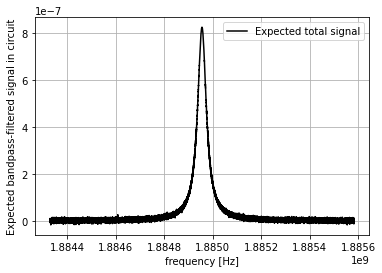

In [457]:
#Just another go at a noiseless signal
V_s = ((w_z**2-w**2)**2*v +w**2*Gamma**2*V_d)/((w_z**2-w**2)**2+w**2*Gamma**2)

#(Gamma**2/4)/((w-w_z)**2 + Gamma**2/4)
#Fitting the Lorentzian
def model(x,centre,width,baseline):
    f = baseline*(width**2/4)/((centre-x)**2+width**2/4)
    return f
p_guess = [300000000,7000,8e-3]


plt.figure()
plt.plot(w,V_s,'k', label = f'Expected total signal')
plt.grid()
plt.legend()
plt.xlabel("frequency [Hz]")
plt.ylabel("Expected bandpass-filtered signal in circuit")
plt.savefig("harmonic peak.png")
plt.show()